# *Predicting* **Handwritten digits**
###### *Deep Learning project by Ayushman Rayaguru*

Handwritten Digit Recognition is an interesting machine learning problem in which we have to identify the handwritten digits through various classification algorithms. There are a number of ways and algorithms to recognize handwritten digits, including Deep Learning/**CNN**, SVM, Gaussian Naive Bayes, KNN, Decision Trees, Random Forests, etc.

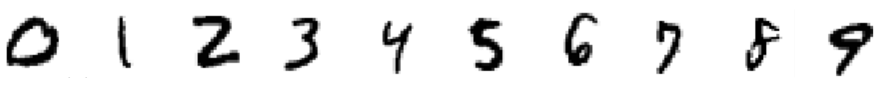

In [32]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


### **Preprocessing data**


In [33]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
num_classes = 10
import tensorflow as tf
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Let's design our **CNN model**

In [34]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

### **Model in a glance**

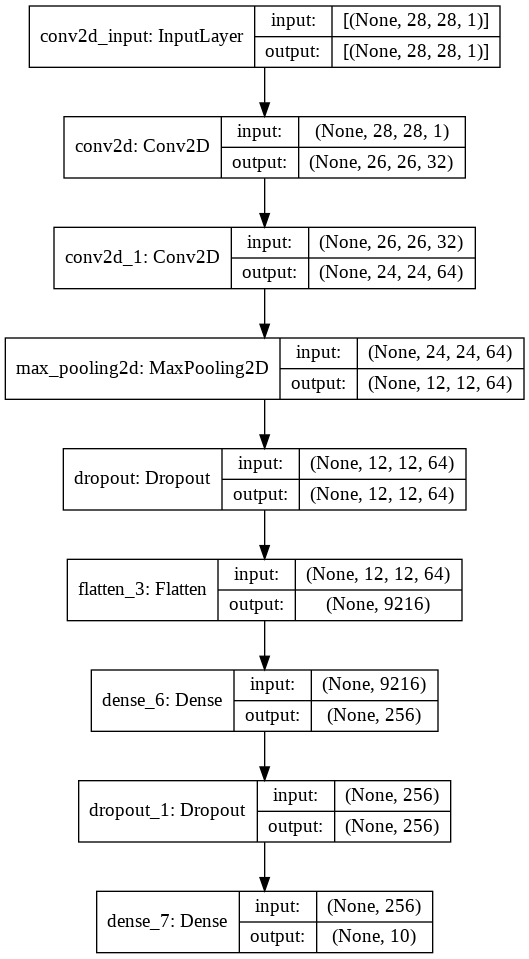

In [35]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### **Training the model**

In [51]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only= True)
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('digits_recog.h5')
print("Saving the model as digits_recog.h5")

Epoch 1/10
469/469 [==============================] - 8s 17ms/step - loss: 0.9403 - accuracy: 0.7335 - val_loss: 0.7251 - val_accuracy: 0.8375
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.8575 - accuracy: 0.7507 - val_loss: 0.6515 - val_accuracy: 0.8467
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.7982 - accuracy: 0.7649 - val_loss: 0.5964 - val_accuracy: 0.8569
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.7449 - accuracy: 0.7781 - val_loss: 0.5532 - val_accuracy: 0.8647
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.7060 - accuracy: 0.7875 - val_loss: 0.5193 - val_accuracy: 0.8697
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.6744 - accuracy: 0.7957 - val_loss: 0.4916 - val_accuracy: 0.8754
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.6477 - accuracy: 0.8009 - val_loss: 0.4689 - val_accuracy: 0.8793

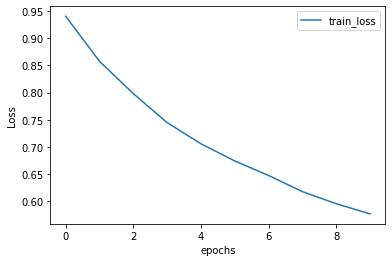

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)

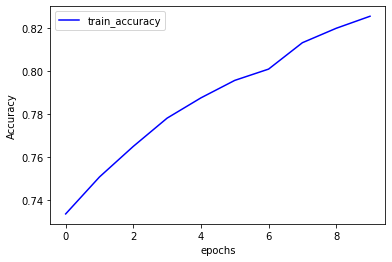

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'b-')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()

### **Evaluating the model**

In [54]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.41778066754341125
Test accuracy: 0.8899000287055969


*Great our model has **accuracy of 90%**.It's ready for its deployment using tkinter*

## *Can accuracy be better ?*
*Lets try making model without use of convolution neural network, rather we will proceed with relu activation function and softmax as last layer.*

### **Load Data**

In [55]:
import tensorflow as tf
obj = tf.keras.datasets.mnist
(train_x,train_y), (test_x, test_y) = obj.load_data()

### ***Using same data***
### *Having a look at the images*

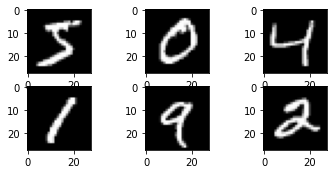

In [56]:
import matplotlib.pyplot as plt
for i in range(6):
  plt.subplot(330 + 1 +i)
  plt.imshow(train_x[i],'gray')

### **Normalizing the training and testing set**

In [57]:
train_x = train_x/255
test_y  = test_y /255

### **Designing the model**

In [58]:
from keras.models import Sequential
from keras.layers import Input,Dense,Flatten

model2 = Sequential()
model2.add(Flatten(input_shape =(28,28)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation ='softmax'))

In [59]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### **Quick glance on model 2**

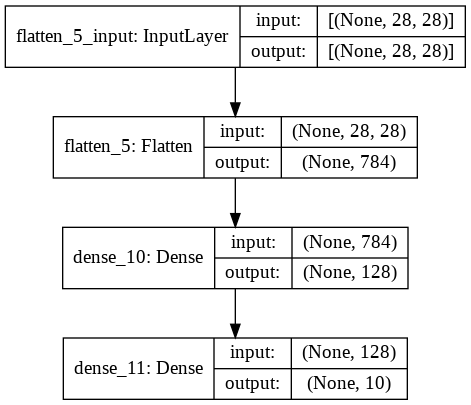

In [60]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

### **Fit the model to training data**

In [61]:
model2.fit(train_x, train_y, epochs = 5)
model2.save('digits_4layer.h5')
print("Saving the model as digits_4layer.h5")

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4217 - accuracy: 0.8815
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1171 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0804 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0446 - accuracy: 0.9866
Saving the model as digits_4layer.h5


### **Evaluating model**

In [62]:
print(model2.evaluate(test_x,test_y))

313/313 [==============================] - 1s 2ms/step - loss: 3968.3496 - accuracy: 0.0967
[3968.349609375, 0.09669999778270721]


6


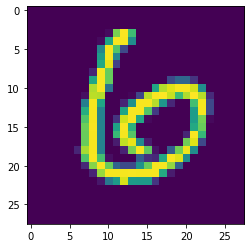

In [65]:
plt.imshow(test_x[11])
prediction = model2.predict(test_x)
print(np.argmax(prediction[11]))

### *Great our model did great work it works with* **accuracy of 96.69**